In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
df = pd.read_csv('google.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [3]:
data = df[['Close']].values

In [4]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [6]:
SEQ_LEN = 60
X, y = create_sequences(data_scaled, SEQ_LEN)

In [7]:
split = int(len(X) * 0.8)  # 80% training data, 20% test data
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(SEQ_LEN, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer for predicting stock prices
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0060
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4.6486e-05
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 4.0784e-05
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 3.9675e-05
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.2924e-05
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 3.8732e-05
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 4.1679e-05
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 3.5557e-05
Epoch 9/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 3.9450e-05
Epoch 10/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3.9585e-05
Epoch 11/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 3.8253e-05
Epoch 12/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 3.3635e-05
Epoch 13/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.2668e-05
Epoch 14/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 3.

In [10]:
predicted = model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [11]:
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test)

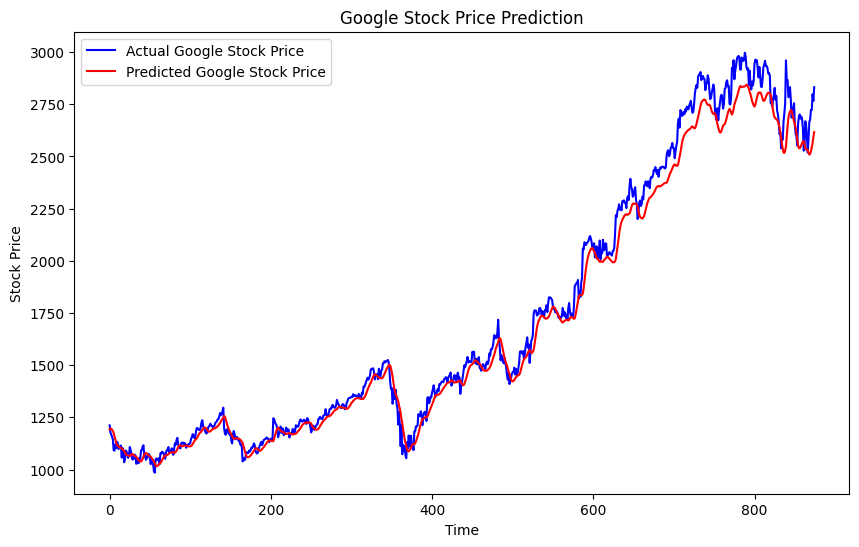

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(real_prices, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()